In [41]:
import pandas as pd
import xarray as xr
import os

import numpy as np
import gsw
import warnings
import matplotlib.pyplot as plt
import erddapy
from erddapy import ERDDAP
from scipy.interpolate import interp2d, interp1d

import cmocean
from netCDF4 import Dataset
import matplotlib.dates as mdates

import geopy
import geopy.distance
import gsw
import matplotlib.ticker as mticker

warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [37]:
e = ERDDAP(server="https://gliders.ioos.us/erddap")
e.constraints = None
e.protocol = "tabledap"
e.dataset_id = "ce_320-20220720T1429"

opendap_url = e.get_download_url(
    response="opendap",
)

e.response = "nc"
#e.variables = ["longitude","depth","latitude","backscatter", "temperature", "salinity","time","dissolved_oxygen","chlorophyll"]

df320 = e.to_pandas(
    index_col="time (UTC)",
    parse_dates=True,
)

df320 = df320[["latitude (degrees_north)", "longitude (degrees_east)", "depth (m)", "CDOM (ppb)", "chlorophyll (ug l-1)",
        "temperature (Celsius)", "salinity (1)", "density (kg m-3)", "dissolved_oxygen (umol kg-1)"]]

df320.rename(columns={df320.columns[0]: 'latitude',df320.columns[1]: 'longitude',df320.columns[2]: 'depth', df320.columns[3]: 'cdom',
                   df320.columns[4]: 'chlorophyll',df320.columns[5]: 'temperature', df320.columns[6]: 'salinity',
                   df320.columns[7]: 'density', df320.columns[8]: 'dissolved_oxygen'}, inplace=True)


df320.head(2)

print(opendap_url)

https://gliders.ioos.us/erddap/tabledap/ce_320-20220720T1429


In [20]:
e = ERDDAP(server="https://gliders.ioos.us/erddap")
e.constraints = None
e.protocol = "tabledap"
e.dataset_id = "ce_383-20220720T1508"

opendap_url = e.get_download_url(
    response="opendap",
)

e.response = "nc"
#e.variables = ["longitude","depth","latitude","backscatter", "temperature", "salinity","time","dissolved_oxygen","chlorophyll"]

df383 = e.to_pandas(
    index_col="time (UTC)",
    parse_dates=True,
)

df383 = df383[["latitude (degrees_north)", "longitude (degrees_east)", "depth (m)", "CDOM (ppb)", "chlorophyll (ug l-1)",
        "temperature (Celsius)", "salinity (1)", "density (kg m-3)", "dissolved_oxygen (umol kg-1)"]]

df383.rename(columns={df383.columns[0]: 'latitude',df383.columns[1]: 'longitude',df383.columns[2]: 'depth', df383.columns[3]: 'cdom',
                   df383.columns[4]: 'chlorophyll',df383.columns[5]: 'temperature', df383.columns[6]: 'salinity',
                   df383.columns[7]: 'density', df383.columns[8]: 'dissolved_oxygen'}, inplace=True)

print(opendap_url)

https://gliders.ioos.us/erddap/tabledap/ce_383-20220720T1508


In [33]:
start320 = '2022-08-03 20:05:54+00:00'
end320 = '2022-08-07 11:41:59+00:00'

df320 = df320.loc[start320:end320,:]
df320.head(3)

,latitude,longitude,depth,cdom,chlorophyll,temperature,salinity,density,oxygen
time (UTC),,,,,,,,,
2022-08-03 20:05:54+00:00,46.859804,-124.959746,6.317120,0.9350,1.862,15.8868,31.270016,1022.9406,258.907476
2022-08-03 20:05:54+00:00,46.859804,-124.959746,9.341731,1.2155,2.051,15.7658,31.307200,1023.0094,261.307920
2022-08-03 20:05:54+00:00,46.859804,-124.959746,12.237383,1.6830,1.799,13.7072,31.199991,1023.3728,266.329480


In [22]:
start383 = '2022-08-03 20:05:54+00:00'
end320 = '2022-08-07 11:41:59+00:00'

df383 = df320.loc[start320:end320,:]
df383.head(3)

,latitude,longitude,depth,cdom,chl,temperature,salinity,density,oxygen
time (UTC),,,,,,,,,
2022-08-03 20:05:54+00:00,46.859804,-124.959746,6.317120,0.9350,1.862,15.8868,31.270016,1022.9406,258.907476
2022-08-03 20:05:54+00:00,46.859804,-124.959746,9.341731,1.2155,2.051,15.7658,31.307200,1023.0094,261.307920
2022-08-03 20:05:54+00:00,46.859804,-124.959746,12.237383,1.6830,1.799,13.7072,31.199991,1023.3728,266.329480


In [6]:
# Read Canadian Gliders
dfDFO = pd.read_csv("glider_VI_clean.csv", skipinitialspace=True)
dfDFO.tail(2)

,longitude,latitude,time,depth,salinity,chlorophyll,dissolved_oxygen,backscatter,temperature,density,CDOM,ID,date,distance,distance_km,dissolved_oxygen_2
12522,-128.672619,48.806587,2022-08-12 03:10:11,68.625420,NaN,0.432,NaN,0.000274,NaN,NaN,NaN,CAN_VI_deep,2022-08-12,220930.556264,220.930556,NaN
12523,-128.672649,48.806587,2022-08-12 03:10:59,49.159026,32.291707,NaN,282.859009,NaN,8.7627,1025.14943,NaN,CAN_VI_deep,2022-08-12,220932.705276,220.932705,6.492059


In [7]:
# Subset Data frame to obtain seperate files for each glider
dfQC = dfDFO[dfDFO['ID']=='CAN_QC_shallow']
dfHG.head(2)

NameError: name 'dfHG' is not defined

In [8]:
dfVI = dfDFO[dfDFO['ID']=='CAN_VI_deep']
dfVI.head(2)

,longitude,latitude,time,depth,salinity,chlorophyll,dissolved_oxygen,backscatter,temperature,density,CDOM,ID,date,distance,distance_km,dissolved_oxygen_2
5715,-126.214930,48.943753,2022-08-04 03:51:31,2.430312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAN_VI_deep,2022-08-04,40131.398090,40.131398,NaN
5716,-126.214944,48.943741,2022-08-04 03:51:36,1.324224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAN_VI_deep,2022-08-04,40132.643448,40.132643,NaN


In [38]:
df320x=df320.reset_index(level=0)
df320x.head(2)

df320x = df320x.to_xarray()
#df383x = df320.to_xarray()
#dfVIx = df320.to_xarray()
#dfQCx = df320.to_xarray()

In [39]:
df320x.head(2)

<xarray.Dataset>
Dimensions:           (index: 2)
Coordinates:
  * index             (index) int64 0 1
Data variables:
    time (UTC)        (index) object 2022-07-20T14:52:47+00:00 2022-07-20T14:...
    latitude          (index) float64 47.71 47.71
    longitude         (index) float64 -124.8 -124.8
    depth             (index) float64 4.78 8.478
    cdom              (index) float64 1.403 1.403
    chlorophyll       (index) float64 16.41 13.65
    temperature       (index) float64 13.07 12.12
    salinity          (index) float64 31.38 31.52
    density           (index) float64 1.024e+03 1.024e+03
    dissolved_oxygen  (index) float64 370.7 369.8

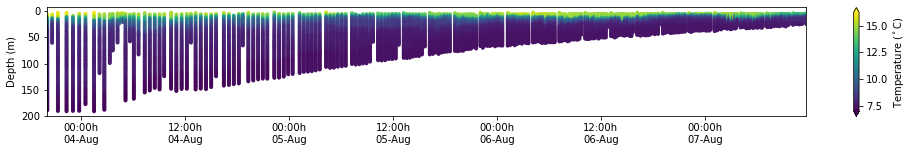

In [12]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(
    df320.index,
    df320["depth"],
    s=15,
    c=df320["temperature"],
    marker="o",
    edgecolor="none"
)

ax.invert_yaxis()
ax.set_xlim(df320.index[0], df320.index[-1])
xfmt = mdates.DateFormatter("%H:%Mh\n%d-%b")
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation="vertical", extend="both")
cbar.ax.set_ylabel("Temperature ($^\circ$C)")
ax.set_ylabel("Depth (m)");

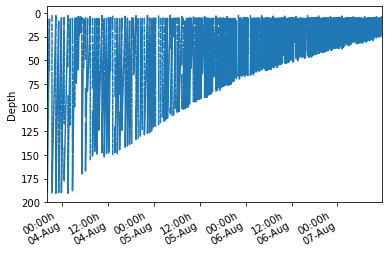

In [13]:
fig, ax = plt.subplots()

ax.plot(df320.index, df320["depth"]);
ax.set_ylabel("Depth");
ax.invert_yaxis()
ax.set_xlim(df320.index[0], df320.index[-1])
xfmt = mdates.DateFormatter("%H:%Mh\n%d-%b")
ax.xaxis.set_major_formatter(xfmt)
fig.autofmt_xdate()

In [14]:
df320['distance']=df320.apply(lambda row: geopy.distance.distance((47, -124.173),
            (row['latitude'],row['longitude'])).km, axis=1)

df383['distance']=df383.apply(lambda row: geopy.distance.distance((47, -124.173),
            (row['latitude'],row['longitude'])).km, axis=1)

dfVI['distance']=dfVI.apply(lambda row: geopy.distance.distance((48.99768, -125.67295),
            (row['latitude'],row['longitude'])).km, axis=1)

dfQC['distance']=dfQC.apply(lambda row: geopy.distance.distance((51.66574, -128.11855),
            (row['latitude'],row['longitude'])).km, axis=1)

/tmp/ipykernel_744/2041144264.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfVI['distance']=dfVI.apply(lambda row: geopy.distance.distance((48.99768, -125.67295),
/tmp/ipykernel_744/2041144264.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQC['distance']=dfQC.apply(lambda row: geopy.distance.distance((51.66574, -128.11855),


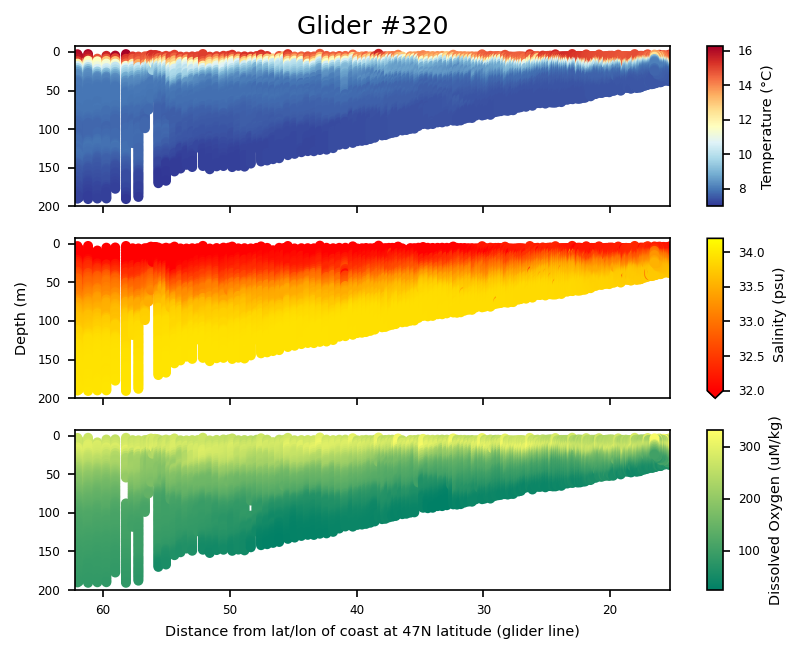

In [15]:
# Plot the data - Distance on x-axis
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True, sharey=True)
fig.set_size_inches(6.4,4.8)
# fig.set_size_inches(8,8)
fig.set_dpi(150)

ms = 56 #marker size
a1 = ax1.scatter(df320.distance, df320['depth'], c=df320['temperature'], marker=".", s=ms, cmap='RdYlBu_r')
a2 = ax2.scatter(df320.distance, df320['depth'], c=df320['salinity'], marker=".", s=ms, cmap='autumn', vmin=32, vmax=34.2)
a3 = ax3.scatter(df320.distance, df320['depth'], c=df320['dissolved_oxygen'], marker=".", s=ms, cmap='summer') #vmin=0, vmax=300
cb1 = plt.colorbar(a1,ax=ax1, aspect=10)
cb2 = plt.colorbar(a2,ax=ax2,extend='min', aspect=10)
cb3 = plt.colorbar(a3,ax=ax3, aspect=10)
cb1.set_label('Temperature (°C)',fontsize='x-small')
cb2.set_label('Salinity (psu)',fontsize='x-small')
cb3.set_label('Dissolved Oxygen (uM/kg)',fontsize='x-small')

ax2.set_ylabel("Depth (m)",fontsize='x-small')
ax1.invert_yaxis()

ax3.set_xlabel('Distance from lat/lon of coast at 47N latitude (glider line)',fontsize='x-small')
ax1.set_xlim(min(df320.distance),max(df320.distance));
ax1.invert_xaxis()

ax1.set_title('Glider #320')

ax1.tick_params(labelsize='xx-small')
ax2.tick_params(labelsize='xx-small')
ax3.tick_params(labelsize='xx-small')
cb1.ax.tick_params(labelsize='xx-small')
cb2.ax.tick_params(labelsize='xx-small')
cb3.ax.tick_params(labelsize='xx-small')

In [16]:
min(df383.distance)

51.29612766827938

In [17]:
df320_trim = df320[df320['distance']<51.29612766827938]
df320_trim.tail(2)

,latitude,longitude,depth,cdom,chlorophyll,temperature,salinity,density,oxygen,distance
time (UTC),,,,,,,,,,
2022-08-07 11:41:59+00:00,47.132459,-124.271379,22.986060,1.2155,0.322,7.7628,33.464615,1026.2122,119.83275,16.513509
2022-08-07 11:41:59+00:00,47.132459,-124.271379,24.572577,1.2155,0.252,7.6996,33.533802,1026.2830,103.23113,16.513509


In [18]:
df383_trim = df383[df383['distance']>51.29612766827938]
df383_trim = df383_trim[df383_trim['distance']<100]
df383_trim.tail(2)

,latitude,longitude,depth,cdom,chlorophyll,temperature,salinity,density,oxygen,distance
time (UTC),,,,,,,,,,
2022-08-11 19:54:11+00:00,46.96462,-124.852324,189.58546,NaN,NaN,7.0798,33.96667,1027.4766,30.13854,51.833004
2022-08-11 19:54:11+00:00,46.96462,-124.852324,NaN,1.5134,0.0888,NaN,NaN,NaN,NaN,51.833004


In [19]:
frames = [df320_trim,df383_trim]
WA = pd.concat(frames)

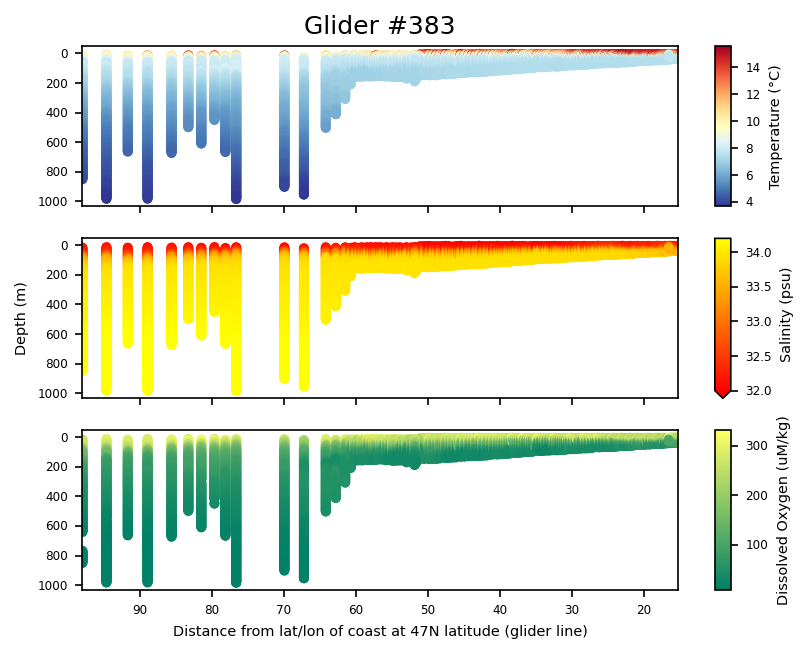

In [20]:
# Plot the data - Distance on x-axis
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True, sharey=True)
fig.set_size_inches(6.4,4.8)
# fig.set_size_inches(8,8)
fig.set_dpi(150)

ms = 56 #marker size
a1 = ax1.scatter(WA.distance, WA['depth'], c=WA['temperature'], marker=".", s=ms, cmap='RdYlBu_r')
a2 = ax2.scatter(WA.distance, WA['depth'], c=WA['salinity'], marker=".", s=ms, cmap='autumn', vmin=32, vmax=34.2)
a3 = ax3.scatter(WA.distance, WA['depth'], c=WA['dissolved_oxygen'], marker=".", s=ms, cmap='summer') #vmin=0, vmax=300
cb1 = plt.colorbar(a1,ax=ax1, aspect=10)
cb2 = plt.colorbar(a2,ax=ax2,extend='min', aspect=10)
cb3 = plt.colorbar(a3,ax=ax3, aspect=10)
cb1.set_label('Temperature (°C)',fontsize='x-small')
cb2.set_label('Salinity (psu)',fontsize='x-small')
cb3.set_label('Dissolved Oxygen (uM/kg)',fontsize='x-small')

ax2.set_ylabel("Depth (m)",fontsize='x-small')
ax1.invert_yaxis()

ax3.set_xlabel('Distance from lat/lon of coast at 47N latitude (glider line)',fontsize='x-small')
ax1.set_xlim(min(WA.distance),max(WA.distance));
ax1.invert_xaxis()

ax1.set_title('Glider #383')

ax1.tick_params(labelsize='xx-small')
ax2.tick_params(labelsize='xx-small')
ax3.tick_params(labelsize='xx-small')
cb1.ax.tick_params(labelsize='xx-small')
cb2.ax.tick_params(labelsize='xx-small')
cb3.ax.tick_params(labelsize='xx-small')

In [29]:
def uniq(da):
    '''Find unique longitudes, and treat them as stations.
    Also return the depth range over which to interpolate.
    '''
    lon = np.unique(da.longitude.values)
    stn = np.array(range(lon.shape[0]))
    depth_int = np.array(range(0, int(np.max(da.depth).values+1), 3))
    return lon, stn, depth_int

In [30]:
def interp(da, station, lon, stn, depth_int):
    '''Given a dataset and station number, return interpolated variables.
    da: dataset
    station: a certain station
    lon, stn: uniques longitudes and station numbers
    depth_int: the depth range over which to interpolate
    '''
    # unique longitudes and stations
    lon, stn, depth_int = uniq(da)
    # pick a station
    s = da.where(da.longitude==lon[station], drop=True)
    lat = s.latitude.values[0] # corresponding latitude
    # original depth for this station
    sd = s.depth.values
    # variables to interpolate
    sn = np.vstack((s.density.values, s.salinity.values, s.temperature.values, \
    s.chlorophyll.values, s.dissolved_oxygen.values))
    f = interp1d(sd, sn, axis=1, fill_value='extrapolate') # fill those above the interpolation range
    da_int = f(depth_int) # interpolation
    da_int[da_int < 0] = np.nan # replace negative values with nan
    # make a dataset
    dataset = xr.Dataset(
    {
        'density': (('depth'), da_int[0,:]),
        'salinity': (('depth'), da_int[1,:]),
        'temperature': (('depth'), da_int[2,:]),
        'chlorophyll': (('depth'), da_int[3,:]),
        'oxygen': (('depth'), da_int[4,:]),
    },
    coords = {
        'lon': lon[station],
        'lat': lat,
        'depth': depth_int,
    })
    dataset = dataset.expand_dims({'station':[station]}) # add a new dimension as the station number

    return dataset

In [42]:
da=df320x
lon, stn, depth_int = uniq(da)
# put all stations together
for station in stn:
    try:
        section = xr.concat([section, interp(da, station, lon, stn, depth_int)], 'station')
    except:
        section = interp(da, station, lon, stn, depth_int)
        section.density.attrs['units'] = 'µmol/L'
        section.salinity.attrs['units'] = 'psu'
        section.temperature.attrs['units'] = 'deg C'

In [44]:
# add distance
d = gsw.distance(section.lon.values, section.lat.values)/1e3 # distance between each station, km
dist = np.cumsum(np.hstack((0,d))) #cumulative sum of dist
section = section.assign_coords({'distance': xr.DataArray(np.flip(dist), coords = [section.station], dims = 'station')
})
section.distance.attrs['units'] = 'km'

In [45]:
section

<xarray.Dataset>
Dimensions:      (station: 2112, depth: 64)
Coordinates:
  * station      (station) int64 0 1 2 3 4 5 6 ... 2106 2107 2108 2109 2110 2111
    lon          (station) float64 -125.0 -125.0 -125.0 ... -124.3 -124.3 -124.3
    lat          (station) float64 46.86 46.85 46.86 46.86 ... 47.13 47.13 47.13
  * depth        (depth) int64 0 3 6 9 12 15 18 ... 171 174 177 180 183 186 189
    distance     (station) float64 1.583e+04 1.583e+04 1.583e+04 ... 0.8614 0.0
Data variables:
    density      (station, depth) float64 1.023e+03 1.023e+03 ... nan nan
    salinity     (station, depth) float64 31.22 31.24 31.26 ... nan nan nan
    temperature  (station, depth) float64 16.46 16.18 15.9 15.61 ... nan nan nan
    chlorophyll  (station, depth) float64 1.811 1.999 2.187 ... nan nan nan
    oxygen       (station, depth) float64 251.6 254.5 257.4 ... nan nan nan

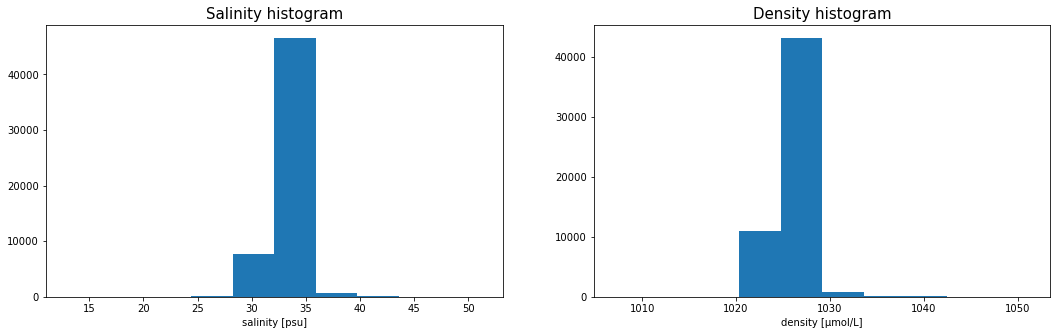

In [46]:
fig = plt.figure(figsize=(18,5))
FONTSIZE = 15
ax = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)
section.salinity.plot.hist(ax=ax)
section.density.plot.hist(ax=ax1);
ax.set_title('Salinity histogram', fontsize=FONTSIZE)
ax1.set_title('Density histogram', fontsize=FONTSIZE);

In [47]:
section_sub = section.where( (section.salinity<35) & (section.density<1030), drop=True)

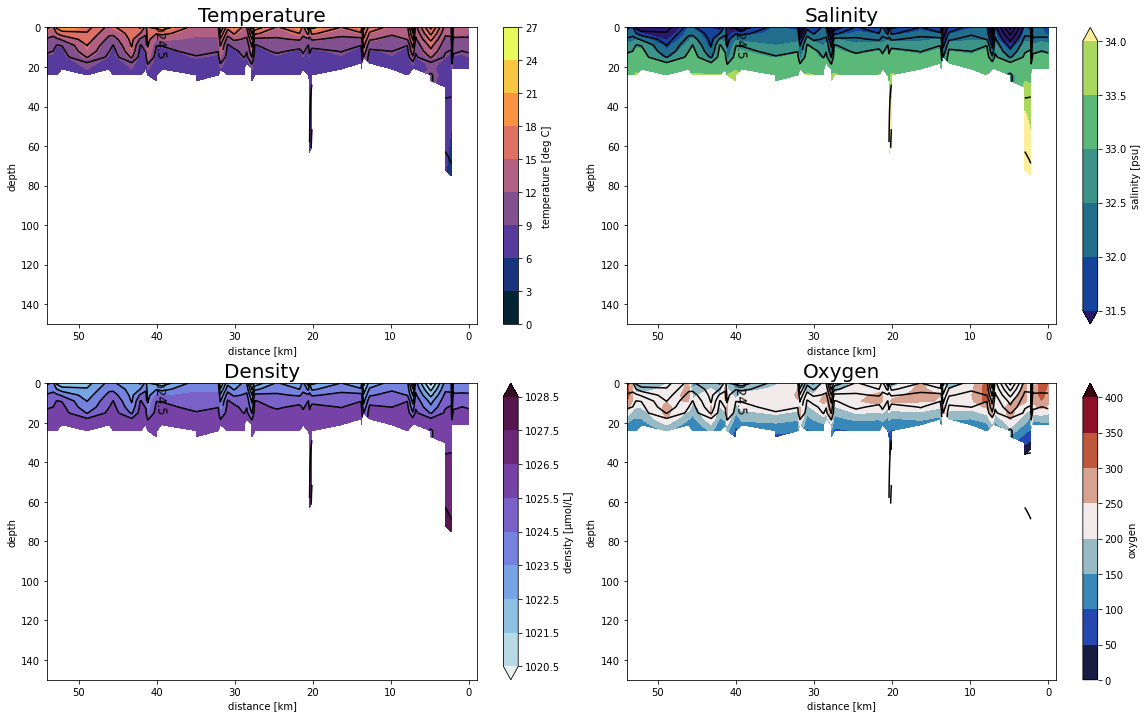

In [50]:
def add_density(ax):
    contours = section_sub.density.plot.contour('distance','depth', ax=ax,colors='k', levels=np.arange(1020.5, 1029.5, 1))
    plt.clabel(contours, inline=True, fmt='%1.1f', fontsize=12) # label densities

fig = plt.figure(figsize=(20,12))
FONTSIZE = 20
    
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharex = ax1, sharey=ax1)
ax3 = fig.add_subplot(2, 2, 3, sharex = ax1, sharey=ax1)
ax4 = fig.add_subplot(2, 2, 4, sharex = ax1, sharey=ax1)

section_sub.temperature.plot.contourf('distance','depth', ax=ax1, cmap=cmocean.cm.thermal, levels=10)
section_sub.salinity.plot.contourf('distance','depth', ax=ax2, cmap=cmocean.cm.haline, levels=np.arange(31.5, 34.5, 0.5))
section_sub.density.plot.contourf('distance','depth', ax=ax3, cmap=cmocean.cm.dense, levels=np.arange(1020.5, 1029.5, 1))
section_sub.oxygen.plot.contourf('distance','depth', ax=ax4, cmap=cmocean.cm.balance, levels=np.arange(0, 420, 50))

add_density(ax1)
add_density(ax2)
add_density(ax3)
add_density(ax4)

ax1.set_ylim(150,0)
ax1.set_xlim(54,-1)
ax1.set_title('Temperature', fontsize=FONTSIZE)
ax2.set_title('Salinity', fontsize=FONTSIZE)
ax3.set_title('Density', fontsize=FONTSIZE)
ax4.set_title('Oxygen', fontsize=FONTSIZE)
plt.subplots_adjust(wspace=0.08, hspace=0.2)